In [2]:
#!/usr/bin/env python
# coding: utf-8
# In[14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("img/input/marimo.png")
gray = cv2.imread("img/input/marimo.png",0)
rgba =  cv2.imread("img/input/marimo.png",-1)

In [3]:
# In[12]
cv2.imwrite("img/output/gmarimo.jpg",gray)#gray

True

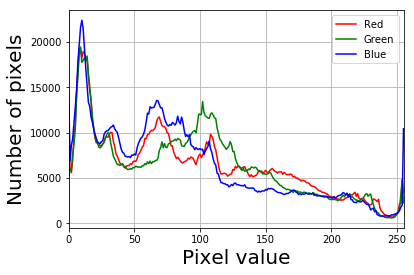

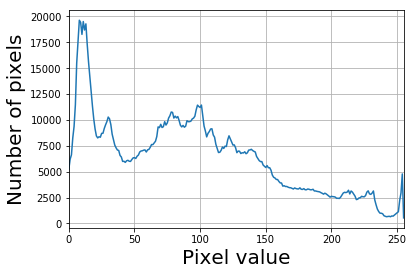

In [4]:
# In[17]:
"""
###ヒストグラム・濃度変換
-------------
ヒストグラム
このヒストグラムは
縦軸：画素数
横軸：画素数(階調値)
つまり、「画像中に画素値が〇〇の画素は何個あるのか」を示します。

形状 　	画像の状態
山が左寄り	暗い画像
山が右寄り	明るい画像
山が中央寄り	コントラストが低い

-------------
"""

def orihistplot():
    b,g,r = img[:,:,0], img[:,:,1], img[:,:,2]
    #RGB
    hist_r, bins = np.histogram(r.ravel(),256,[0,256])
    hist_g, bins = np.histogram(g.ravel(),256,[0,256])
    hist_b, bins = np.histogram(b.ravel(),256,[0,256])
    #Gray
    hist, bins = np.histogram(gray.ravel(),256,[0,256])
    plt.xlim(0, 255)
    plt.plot(hist_r, "-r", label="Red")
    plt.plot(hist_g, "-g", label="Green")
    plt.plot(hist_b, "-b", label="Blue")
    plt.xlabel("Pixel value", fontsize=20)
    plt.ylabel("Number of pixels", fontsize=20)
    plt.legend()
    plt.grid()
    plt.show()
    plt.xlim(0, 255)
    plt.plot(hist)
    plt.xlabel("Pixel value", fontsize=20)
    plt.ylabel("Number of pixels", fontsize=20)
    plt.grid()
    plt.show()
    
orihistplot()

In [22]:
# In[21]:


"""
ガンマ補正
画像のコントラストを調節し、視認しやすくするのによく使われる

url<https://algorithm.joho.info/image-processing/gamma-correction/>
"""
gamma = 1.0

# 画素値の最大値
imax = gray.max() 
    
# ガンマ補正
gray = imax * (gray / imax)**(1/gamma)

# 結果の出力
cv2.imwrite("img/output/gamma3.jpg", gray)

True

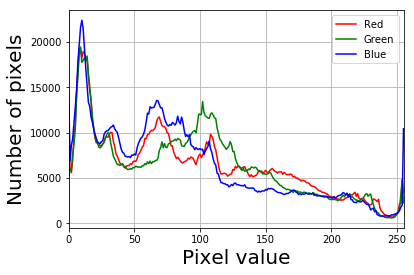

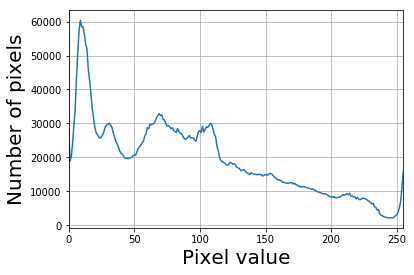

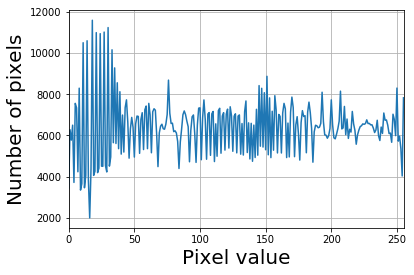

In [23]:

# In[27]:
"""
ヒストグラム平均化
画素数を縦軸に取り輝度値を横軸に取るそのグラフを平たんにすることで見やすくする。
"""
def equalize_hist(src):
   # 画像の高さ・幅を取得
   h, w = src.shape[0], src.shape[1]
   
   # 全画素数
   s = w * h
   
   # 画素値の最大値
   imax = src.max()
   
   # ヒストグラムの算出
   hist, bins = np.histogram(src.ravel(),256,[0,256])

   # 出力画像用の配列（要素は全て0）
   dst = np.empty((h,w))

   for y in range(0, h):
    for x in range(0, w):
           # ヒストグラム平均化の計算式
           dst[y][x] = np.sum(hist[0: src[y][x]]) * (imax / s)

    return dst



gray2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# 方法2(OpenCVで実装)
dst2 = cv2.equalizeHist(gray2)
# 結果の出力
cv2.imwrite("img/output/Histmarimo.jpg", dst2)
def avehistplot():
    #ヒストグラム
    eqHgray = cv2.imread("img/output/Histmarimo.jpg",0)

    #Gray
    hist, bins = np.histogram(eqHgray.ravel(),256,[0,256])

    plt.xlim(0, 255)
    plt.plot(hist)
    plt.xlabel("Pixel value", fontsize=20)
    plt.ylabel("Number of pixels", fontsize=20)
    plt.grid()
    plt.show()
    
orihistplot()
avehistplot()

In [24]:
"""
k-means法
k個の個体を適当に取り出す。その取り出した個体を中心としてその周辺の点をまとめてグループ分けする。
そのグループで重心を計算し、そこを中心とする。この操作を繰り返す。
url<http://tech.nitoyon.com/ja/blog/2013/11/07/k-means/>
"""

# 減色処理
def sub_color(src, K):

    # 次元数を1落とす
    Z = src.reshape((-1,3))

    # float32型に変換
    Z = np.float32(Z)

    # 基準の定義
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    # K-means法で減色
    ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # UINT8に変換
    center = np.uint8(center)

    res = center[label.flatten()]

    # 配列の次元数と入力画像と同じに戻す
    return res.reshape((src.shape))


# 減色処理(三値化)
dst = sub_color(img, K=3)
    
# 結果を出力
cv2.imwrite("img/output/kmarimo.jpg", dst)

True

In [25]:
###フィルタ
"""
平均化
ある周辺8近傍の画素値を平均化して新しい画素値としている
画像のノイズを消すことができる（ココでのノイズとは「夜に星をとったときの荒い感じ」「」）
"""
gray = cv2.imread("img/input/marimo.png",0)
dst3 = cv2.blur(gray,ksize=(3,3))
cv2.imwrite("img/output/avemarimo.jpg",dst3)

True

In [26]:
"""
ガウシアンフィルタ
ガウス分布を用いて画像の平滑化する。
ksizeは奇数である
ぼかし度はksizeとsigmaの値で変化する。
ksize = 近傍のとる大きさ
sigmaX = 中心の重み
"""
dst3 = cv2.GaussianBlur(gray,ksize=(3,3),sigmaX=1.3)
cv2.imwrite("img/output/gaussmarimo.jpg",dst3)

True

In [34]:
"""
メディアンフィルタ
中央値を利用してぼかす
ksizeは奇数
ぼかし度はksizeの大きさで決まる
"""
gray = cv2.imread("img/input/marimo.png",0)
dst3 = cv2.medianBlur(gray,ksize=3)
cv2.imwrite("img/output/medianmarimo.jpg",dst3)

True

In [46]:
"""
1次微分フィルタ
今回は垂直方向の変化をみる。
白から黒に変わったところの変化が大きいところを出力しedgeを出す。
画素値の変化をとらえる。
"""
gray = cv2.imread("Images/board2.jpg",0)
kernel = np.array([[0,0,0],[-1,0,1],[0,0,0]])
dst3 = cv2.filter2D(dst,cv2.CV_64F,kernel)
cv2.imwrite("img/output/defboard.jpg",dst3)

True